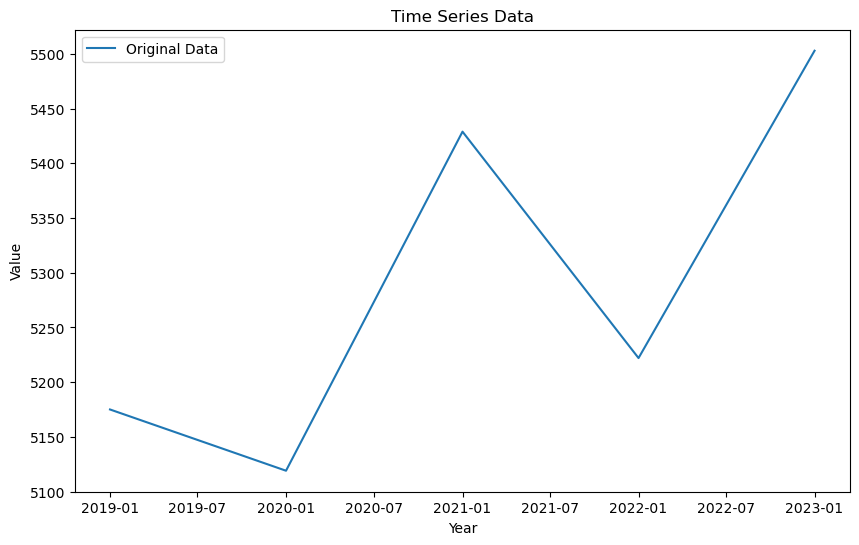

C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Jiacheng Zheng\anaconda3\Lib\s

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -13.191
Date:                Thu, 21 Nov 2024   AIC                             32.382
Time:                        16:32:49   BIC                             28.461
Sample:                    01-01-2019   HQIC                            24.182
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      2.696     -0.371      0.711      -6.283       4.283
ma.L1          0.9874    179.652      0.005      0.996    -351.124     353.099
sigma2      2.486e+04      0.002   1.28e+07      0.0

Forecasted values: 2022-01-01    5276.189984
2023-01-01    5428.985482
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

# 忽略ARIMA警告
warnings.simplefilter('ignore', ConvergenceWarning)

# 假设你有一个包含时间序列数据的DataFrame df
# 例如，数据的列名为 'Date' 和 'Value'

# 创建时间序列数据
data = {'Date': ['2019', '2020', '2021', '2022', '2023'],
        # 'Value': [4412, 4862, 5806, 6536, 6980]}
        'Value': [5175, 5119, 5429, 5222, 5503]}

df = pd.DataFrame(data)

# 转换 'Date' 列为日期格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y')
df.set_index('Date', inplace=True)

# 可视化原始数据
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# 拆分数据为训练集和测试集（例如，使用前3年的数据作为训练集）
train = df['Value'][:3]
test = df['Value'][3:]

# ARIMA 模型拟合
# 设置 ARIMA 的参数 (p,d,q) , 其中 p = 自回归项数, d = 差分阶数, q = 移动平均项数
model = ARIMA(train, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# 打印模型的总结
print(model_fit.summary())

# 进行预测
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model - Forecast vs Actual')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# 输出预测结果
print(f'Forecasted values: {forecast}')
